## Food Demand Forecasting Challenge(Practice Problem at analytics Vidhya)
 
* about : https://datahack.analyticsvidhya.com/contest/genpact-machine-learning-hackathon-1/#About) 
* data description : https://datahack.analyticsvidhya.com/contest/genpact-machine-learning-hackathon-1/#ProblemStatement
* forecasting target : num_orders
* Evaluation : 100 * RMSLE ( root of mean squared logarithmic error )


## 1. Data Exploration

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df_info_meal = pd.read_csv('./data/meal_info.csv')
df_info_fulfil = pd.read_csv('./data/fulfilment_center_info.csv')

In [8]:
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [15]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB
None


In [5]:
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [16]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
dtypes: float64(2), int64(6)
memory usage: 2.0 MB
None


In [9]:
df_info_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [17]:
print(df_info_meal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
meal_id     51 non-null int64
category    51 non-null object
cuisine     51 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None


In [10]:
df_info_fulfil.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [18]:
print(df_info_fulfil.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
center_id      77 non-null int64
city_code      77 non-null int64
region_code    77 non-null int64
center_type    77 non-null object
op_area        77 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB
None


* Train, Test 셋과 물류센터정보/음식정보 데이터 셋을 center_id, meal_id 기준으로 Merge 
* Merge 후 train data의 컬럼은 target컬럼을 제외하고 8개에서 14개로 증가

In [19]:
df_train = pd.merge(df_train, df_info_fulfil, how="left",
                    left_on='center_id',
                    right_on='center_id')

df_train = pd.merge(df_train, df_info_meal, how='left',
                    left_on='meal_id',
                    right_on='meal_id')

df_test = pd.merge(df_test, df_info_fulfil, how="left",
                   left_on='center_id',
                   right_on='center_id')

df_test = pd.merge(df_test, df_info_meal, how='left',
                   left_on='meal_id',
                   right_on='meal_id')

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
category                 456548 non-null object
cuisine                  456548 non-null object
dtypes: float64(3), int64(9), object(3)
memory usage: 55.7+ MB


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
city_code                32573 non-null int64
region_code              32573 non-null int64
center_type              32573 non-null object
op_area                  32573 non-null float64
category                 32573 non-null object
cuisine                  32573 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ MB


* train, test data 모두 결측치는 존재하지 않음

In [23]:
df_train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [24]:
df_test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [77]:
c_col = df_train.columns[df_train.dtypes == 'object']
n_col = df_train.columns[df_train.dtypes != 'object']

### 숫자형 컬럼 탐색(min/max/median)

In [85]:
for i in n_col:
    
    print(i, "unique value min/max/median")
    print("uniques : ", len(df_train[i].value_counts()))
    print("Min     : ", df_train[i].value_counts().min())
    print("Max     : ", df_train[i].value_counts().max())
    print("Median  : ", df_train[i].value_counts().median())
    print('\n')

id unique value min/max/median
uniques :  456548
Min     :  1
Max     :  1
Median  :  1.0


week unique value min/max/median
uniques :  145
Min     :  2786
Max     :  3359
Median  :  3205.0


center_id unique value min/max/median
uniques :  77
Min     :  3432
Max     :  7046
Median  :  5938.0


meal_id unique value min/max/median
uniques :  51
Min     :  2357
Max     :  11138
Median  :  9811.0


checkout_price unique value min/max/median
uniques :  1992
Min     :  1
Max     :  7342
Median  :  44.0


base_price unique value min/max/median
uniques :  1907
Min     :  1
Max     :  9513
Median  :  34.0


emailer_for_promotion unique value min/max/median
uniques :  2
Min     :  37050
Max     :  419498
Median  :  228274.0


homepage_featured unique value min/max/median
uniques :  2
Min     :  49855
Max     :  406693
Median  :  228274.0


num_orders unique value min/max/median
uniques :  1250
Min     :  1
Max     :  12397
Median  :  6.0


city_code unique value min/max/median
uniques :  51
Min

* id 컬럼은 분석제외(중복값이 없음)

### 숫자형 컬럼 탐색(빈도수)

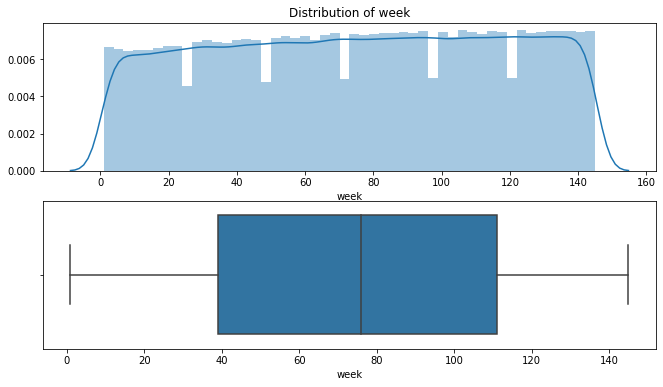

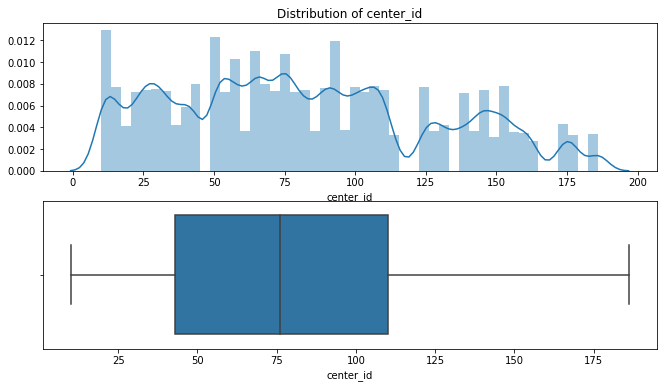

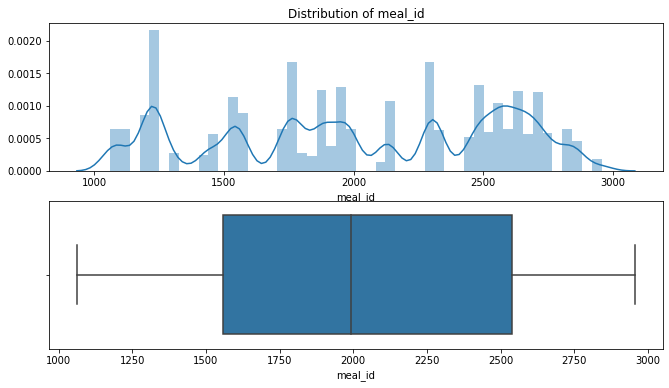

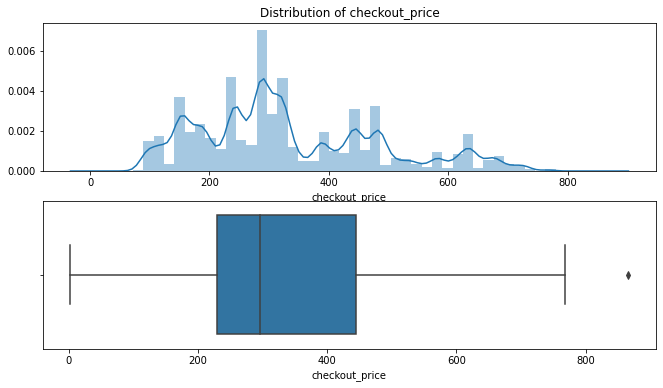

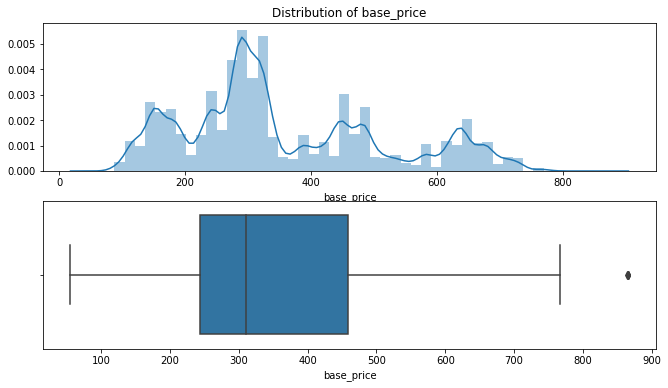

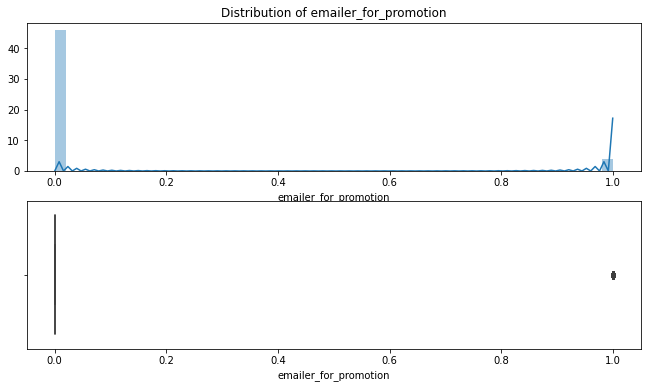

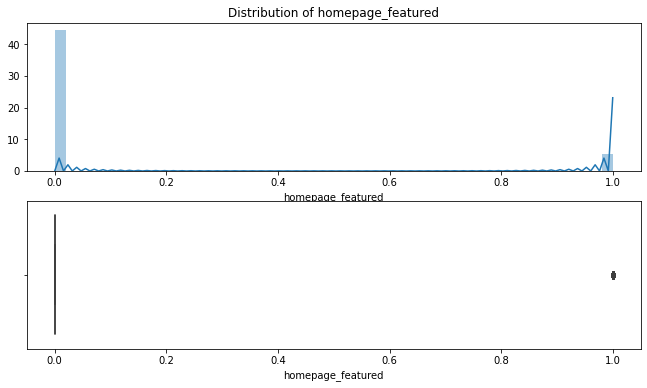

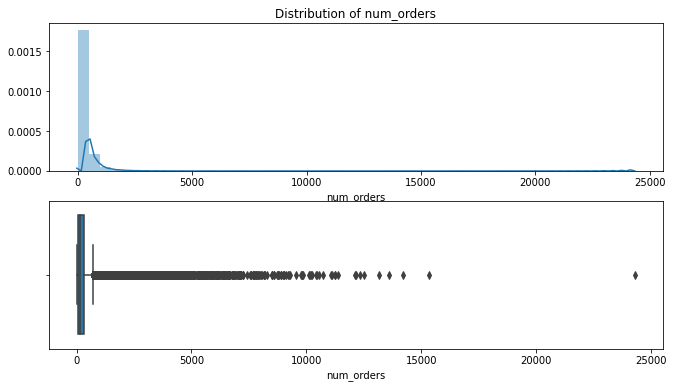

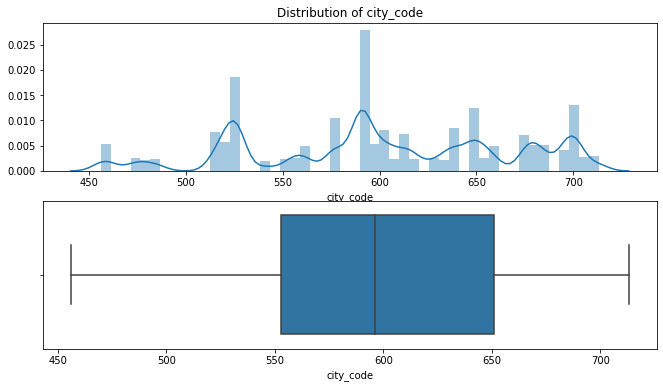

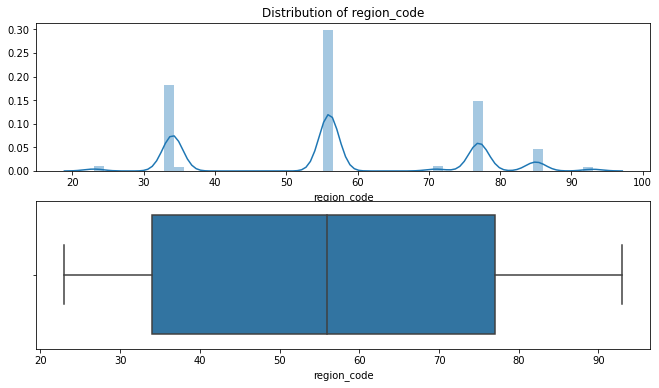

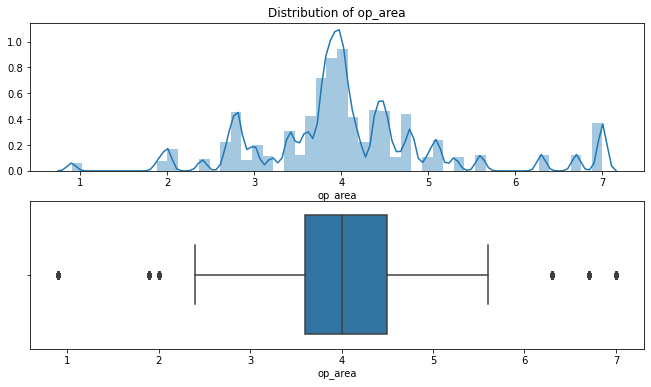

In [91]:
for i in n_col:
    
    if len(df_train[i].value_counts()) < 2000:

        f, axes = plt.subplots(2, 1, figsize=(11, 6))

        sns.distplot(df_train[i], 
                     ax = axes[0]).set_title("Distribution of {}".format(i))
        sns.boxplot(df_train[i], ax = axes[1])
        plt.show()
        
    else:
        
        pass

* week는 1 ~ 145주 범위로 주기적으로 주문횟수가 감소(약 30주기)
* base_price와 checkout_price의 분포는 유사한 모습을 보임
* emailer_for_promotion, homepage_feature 는 1,0의 값으로 0값을 갖는 경우가 대부분임 
* base_price와 checkout_price의 분포는 유사한 모습을 보임
* id 당 num_ourders는 1,000개 이하가 대부분
* op_area는 3km ~ 5km 구간의 빈도가 높음 

### 카테고리형 컬럼 탐색(빈도수)

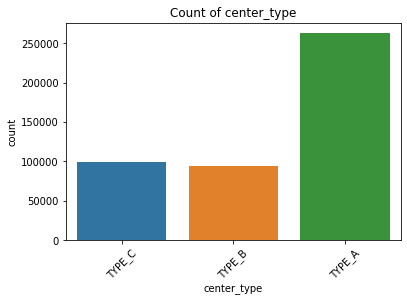

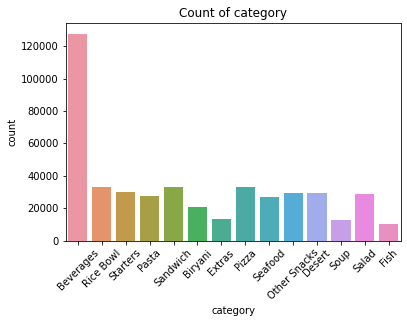

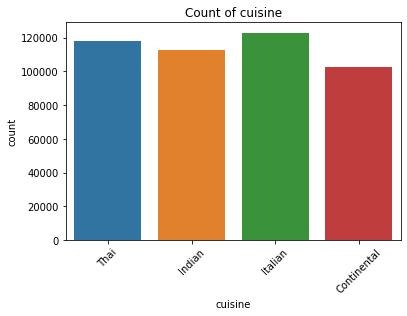

In [92]:
for i in c_col:
    
    ax = sns.countplot(df_train[i])
    ax.set_title("Count of {}".format(i))
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    plt.show()
    

* center_type은 3가지 카테고리로 구성되며, TYPE_A의 빈도가 가장 높음
* 음식category는 Beverages의 빈도가 가장 높고, Fish, Soup, Extras의 빈도가 낮은 편임
* cuisine은 4가지 카테고리로 구성되며, 서로 유사한 빈도를 보여줌

### 카테고리형 컬럼 탐색(주문수량)

center_type
TYPE_A    68978517
TYPE_B    29996073
TYPE_C    20582895
Name: num_orders, dtype: int64


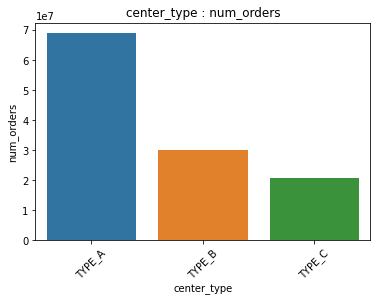

category
Beverages       40480525
Biryani           631848
Desert           1940754
Extras           3984979
Fish              871959
Other Snacks     4766293
Pasta            1637744
Pizza            7383720
Rice Bowl       20874063
Salad           10944336
Sandwich        17636782
Seafood          2715714
Soup             1039646
Starters         4649122
Name: num_orders, dtype: int64


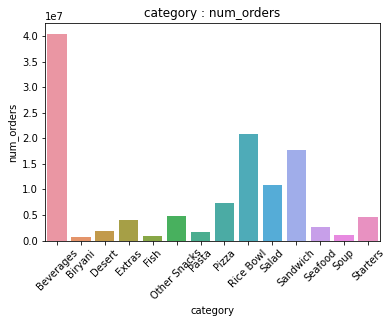

cuisine
Continental    16914439
Indian         25792544
Italian        44172832
Thai           32677670
Name: num_orders, dtype: int64


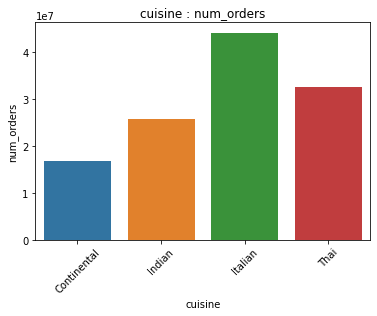

In [126]:
for i in c_col:
    
    print(df_train.groupby(i)['num_orders'].sum())
    
    df_temp = df_train.groupby(i).sum()
    df_temp.reset_index(inplace=True)
    
    ax = sns.barplot(x=i, y='num_orders', data=df_temp)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    ax.set_title("{} : num_orders".format(i))
    plt.show()

* center_type : TYPE_A의 주문수량이 가장 많으며, 빈도수에서 거의 차이를 보이지 않았던 B 와 C의 차이가 나타남(TYPE_B > TYPE C)
* category : 빈도수가 많았던 Beverages의 주문수량이 가장 많음. 다음으로 Rice Bowl, salad, sandwich순으로 주문수량이 많음
* cuisine : 각 카테고리별 빈도수의 차이는 크지 않았으나, 주문수량 기준으로는 Italian이 가장 많고, continental의 수량이 가장 적음

In [151]:
n_col_exid = n_col.drop(['id'])

### 숫자형 컬럼 탐색(주문수량)

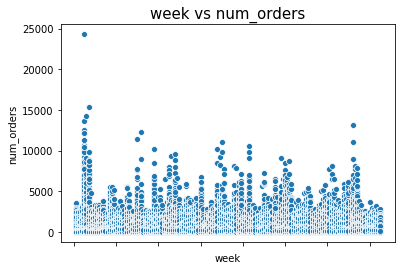

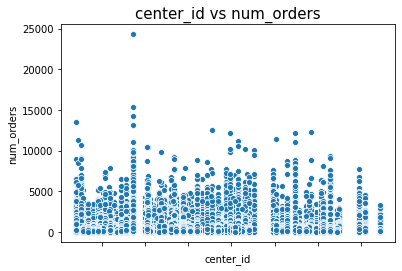

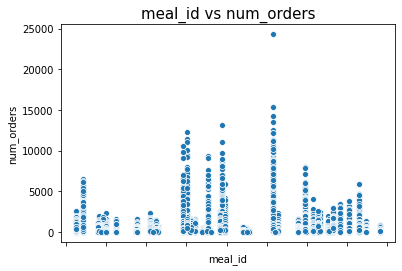

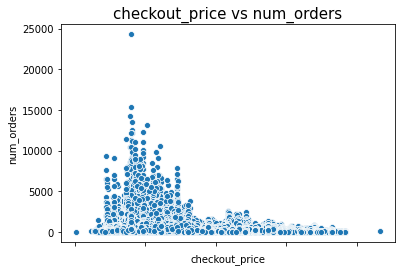

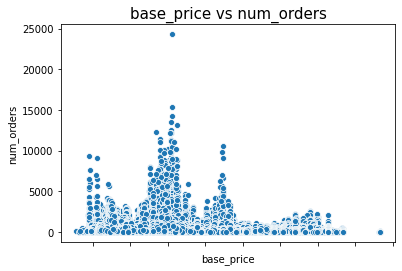

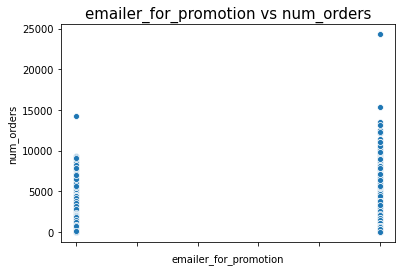

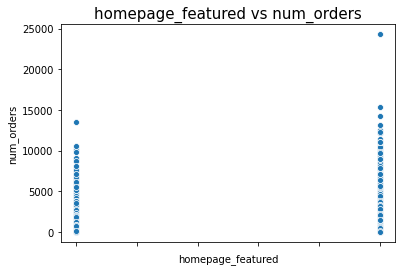

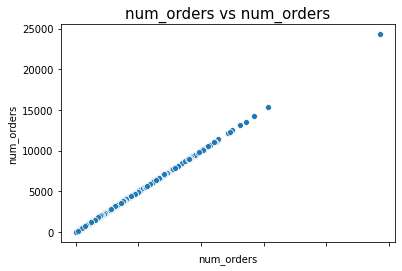

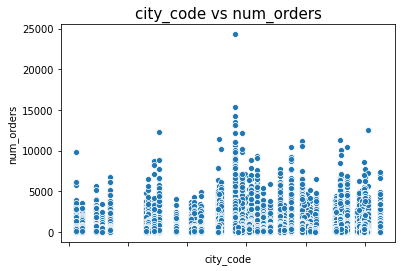

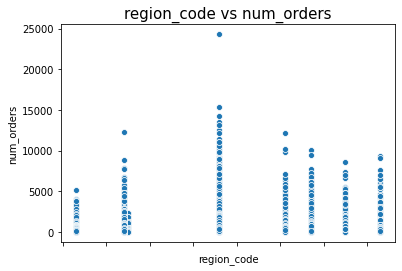

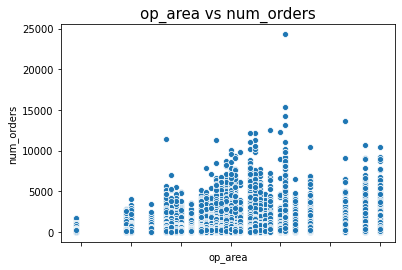

Wall time: 15.5 s


In [154]:
%%time
for i in n_col_exid:

    ax = sns.scatterplot(df_train[i], df_train['num_orders'])
    ax.set_title('{} vs num_orders'.format(i), fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=15)
    plt.show()

* emailer_for_promotion, homepage_feature는 빈도수기준으로는 0인 경우가 많았으나, 1인 경우 주문수량이 상대적으로 큰 모습을 보임

### 컬럼간 상관관계 Matrix

In [158]:
df_train_temp = df_train.drop(['id'], axis=1)

In [160]:
corr_df_train = df_train_temp.corr()

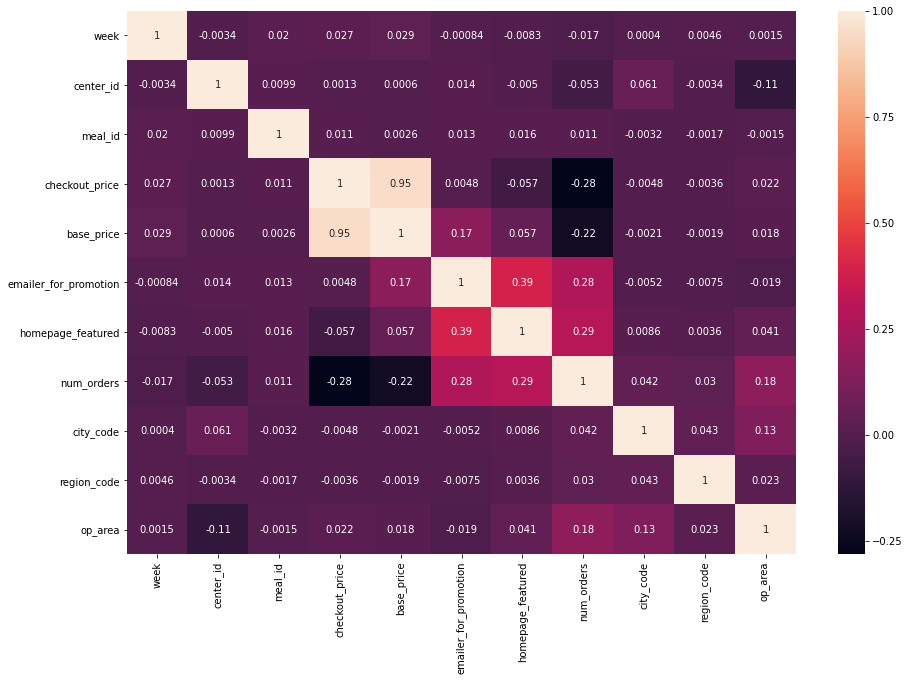

In [161]:
plt.figure(figsize=(15,10))
a = sns.heatmap(corr_df_train, annot=True)

* 약한수준이지만 num_orders와 checkout_price, base_price간 음의 상관관계를 가지고 있음
* checkout_price, base_price간의 상관관계는 1에 가까움(checkout_price는 base_price에서 파생 된 값)
* 프로모션 활동인 emailer_for_promotion, homepage_featured와 num_orders간의 상관관계는 높은 수준이 아닌것으로 보임
* op_area의 경우 num_orders와 작지만 양의 상관관계를 보임.(관리구역이 넓어질수록 고객수가 늘어나기 때문으로 추정)
* 전반적으로 각 피쳐간 상관관계는 높지 않음

### 주문수량 주간시계열(meal_id 기준)

In [280]:
df_train_byweek = df_train.groupby(['week','meal_id']).sum()

In [281]:
df_train_byweek.reset_index(inplace = True)

In [297]:
len(df_train_byweek['meal_id'].value_counts())

51

In [301]:
meal_id_col = list(df_train_byweek['meal_id'].value_counts().index)

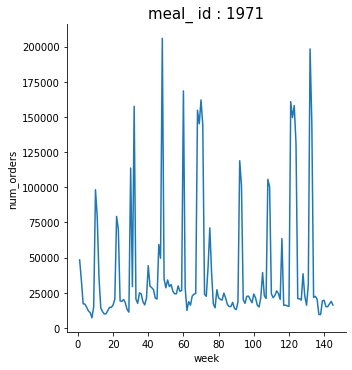

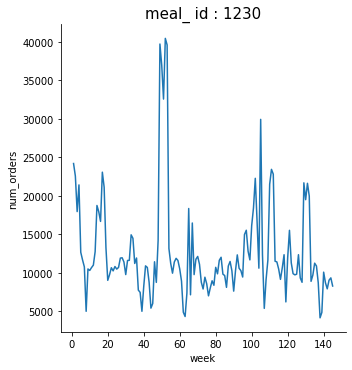

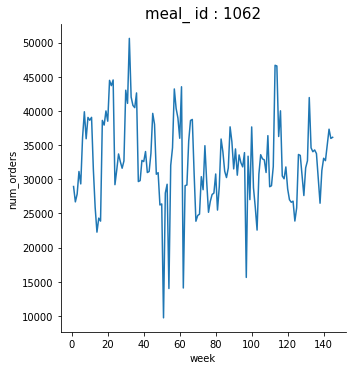

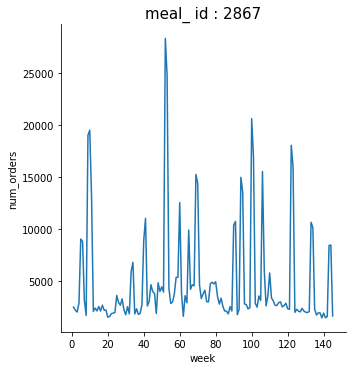

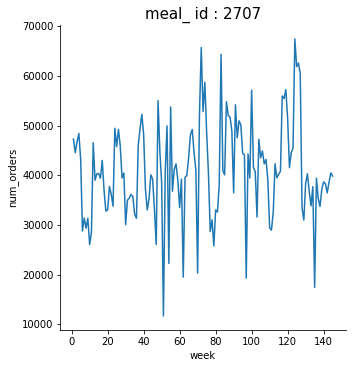

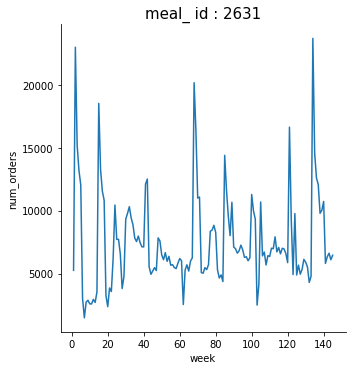

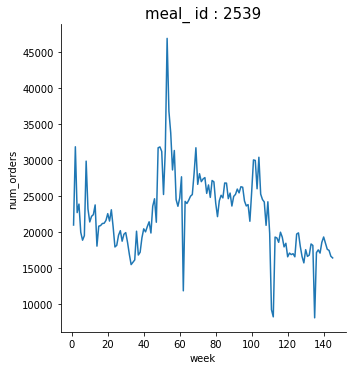

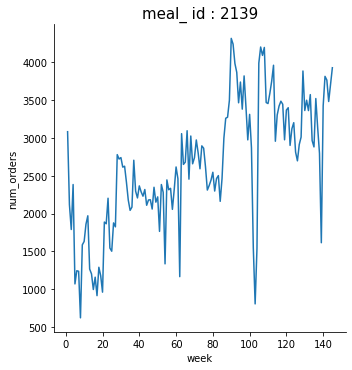

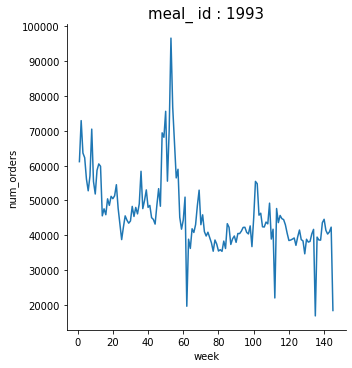

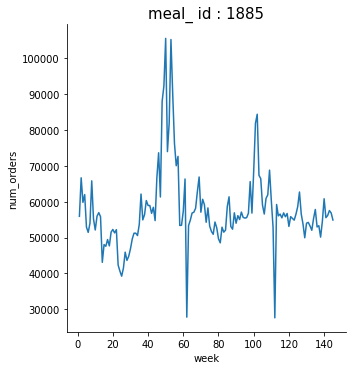

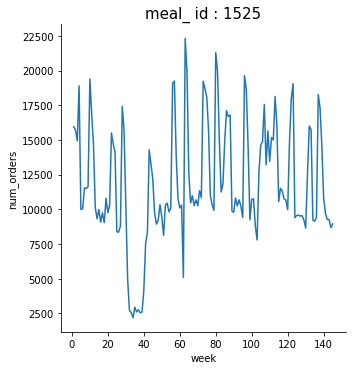

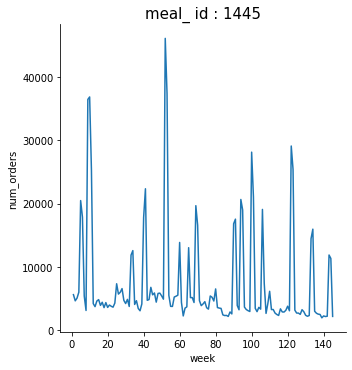

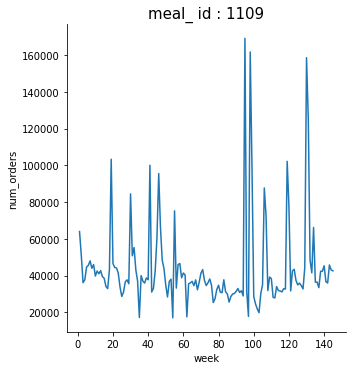

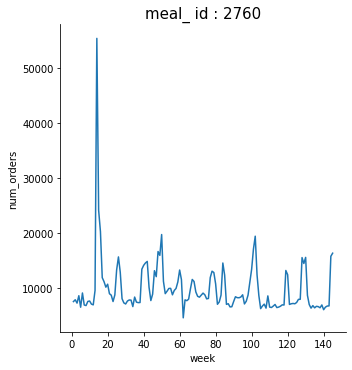

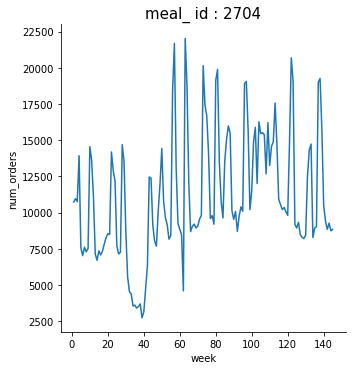

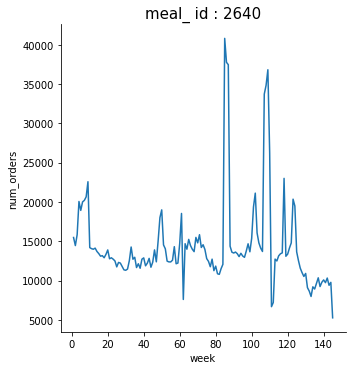

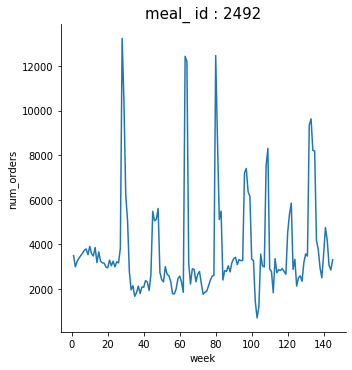

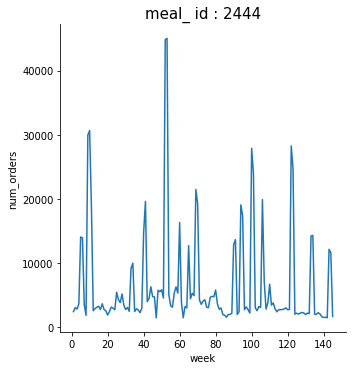

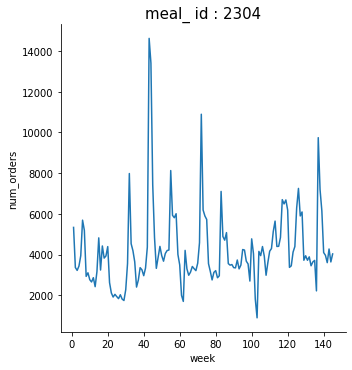

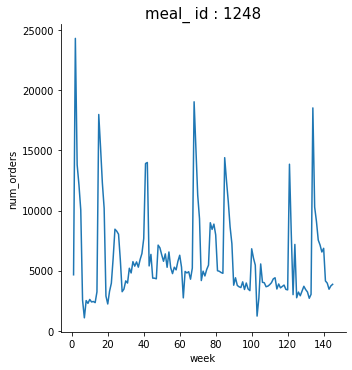

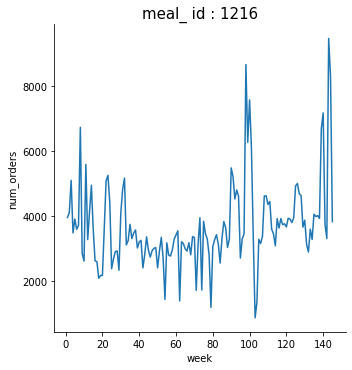

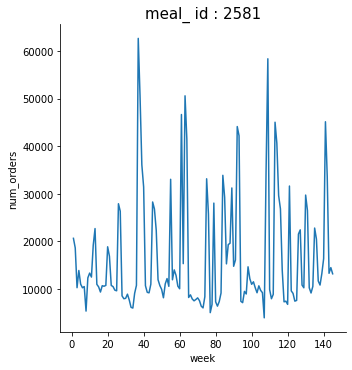

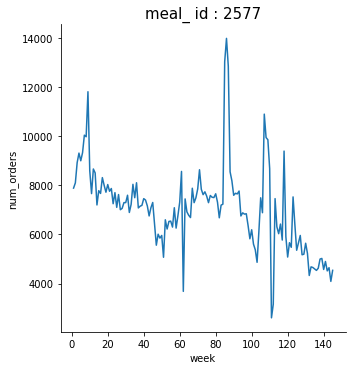

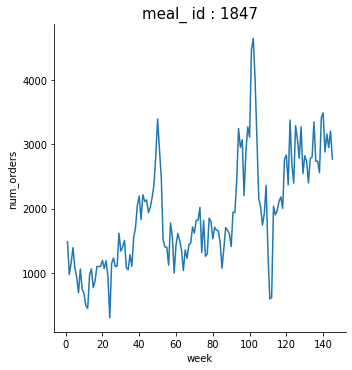

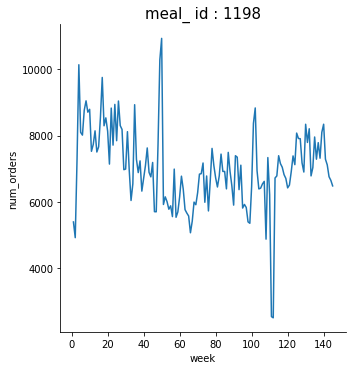

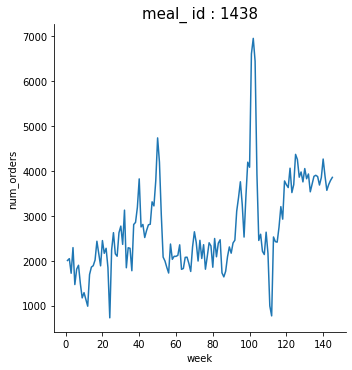

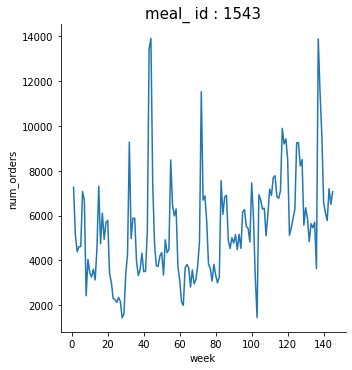

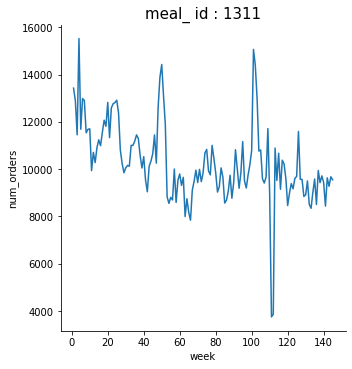

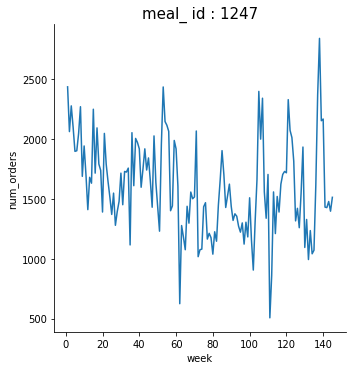

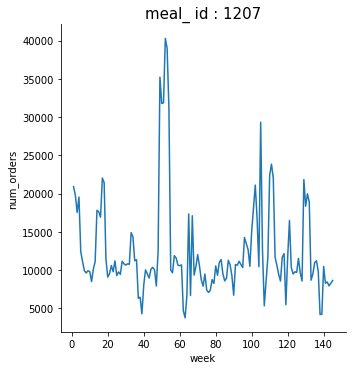

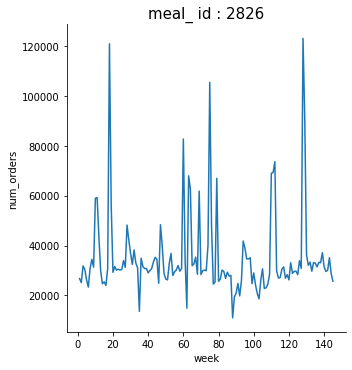

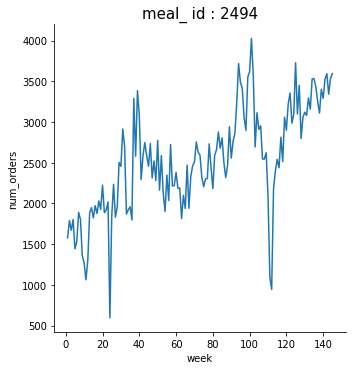

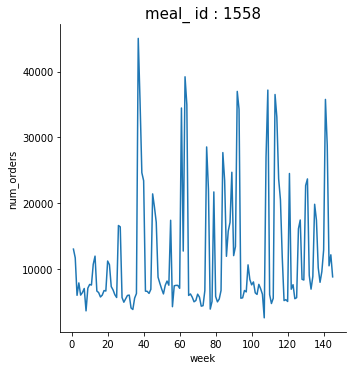

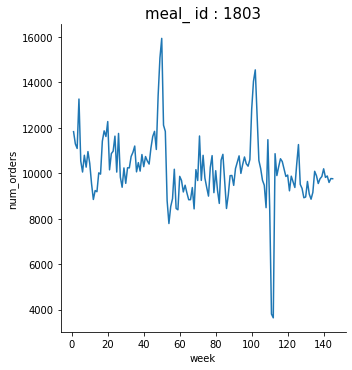

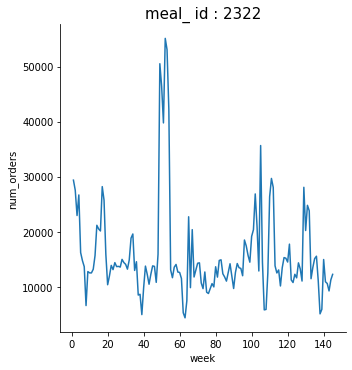

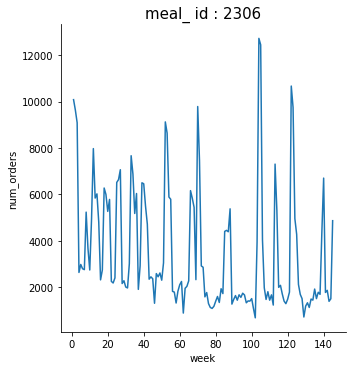

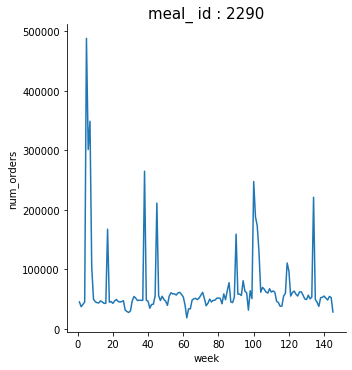

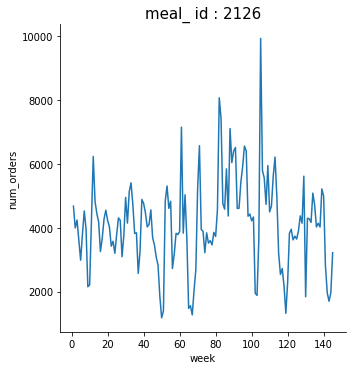

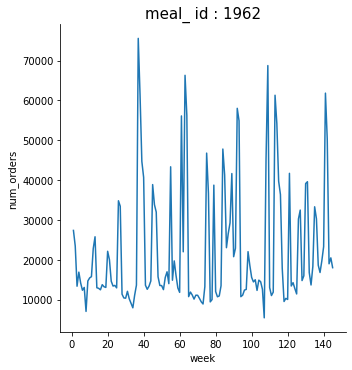

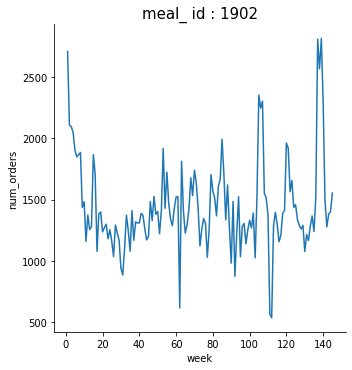

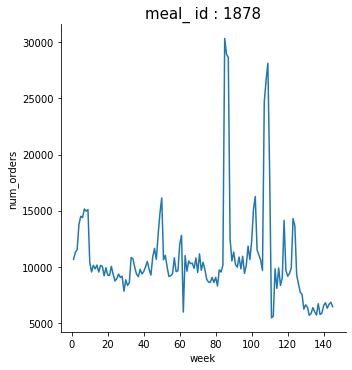

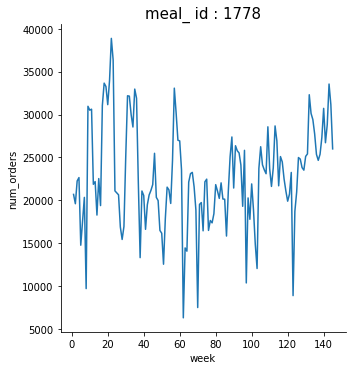

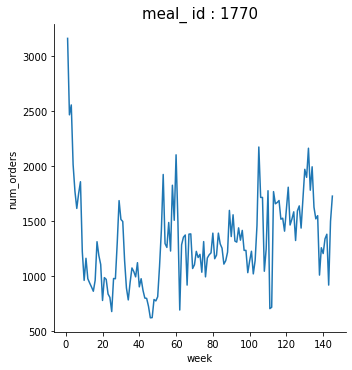

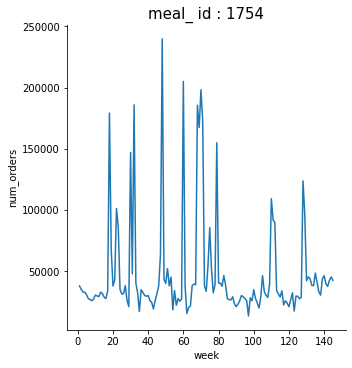

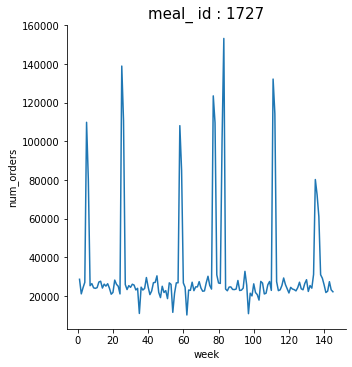

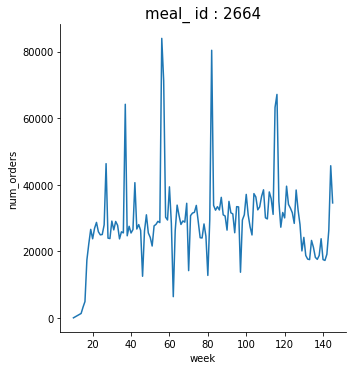

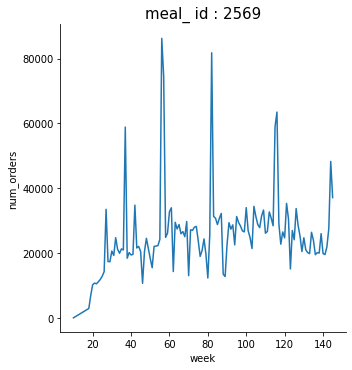

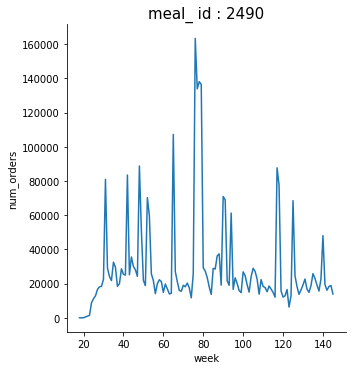

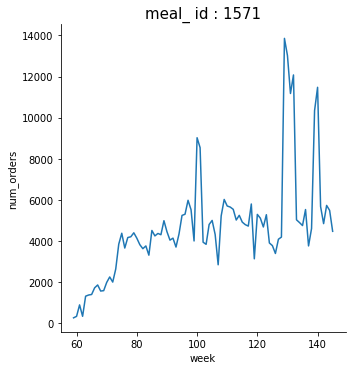

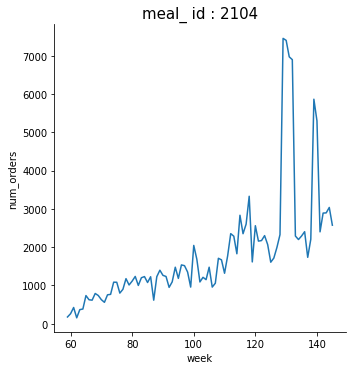

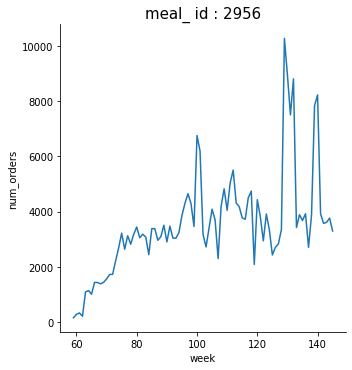

Wall time: 16.6 s


In [313]:
%%time

for i in meal_id_col:
    
    df_1 = df_train_byweek[df_train_byweek['meal_id']==i]
    ax = sns.relplot(x='week', y='num_orders', kind='line', data = df_1)
    plt.title('meal_ id : {}'.format(i), fontsize=15)
    plt.show()

* meal_id 기준으로 2139,1847,2494,2104,2956는 상승트렌드를, 2577,1993은 하락트렌드를 보이나, 나머지 상품들은 주문량을 일정하게 유지하면서, 주문량이 일시적으로 크게 증가하고 다시 감소하는 패턴을 보임
* 일부 상품의 경우 주문량이 크게 증가 할 경우 이후 이전에 평균적으로 유지하던 주문량보다 일시적으로 더 낮아지는 패턴을 보임  

### 주문수량 주간시계열(category 기준)

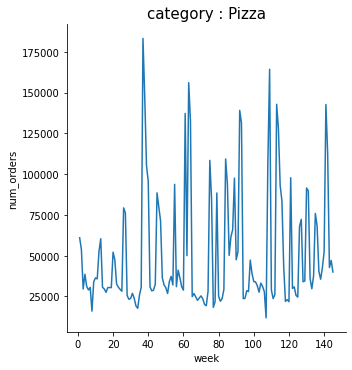

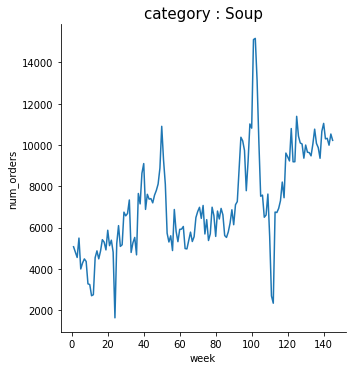

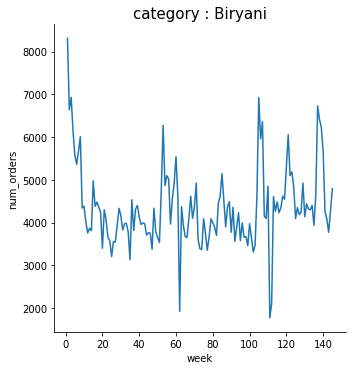

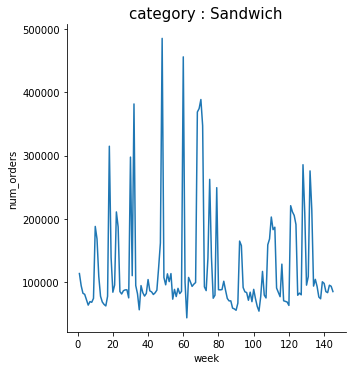

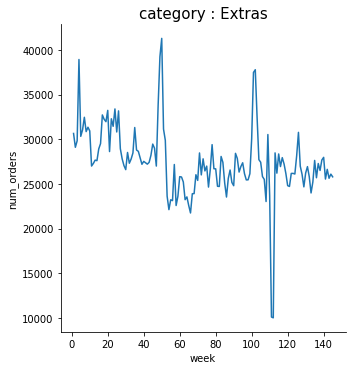

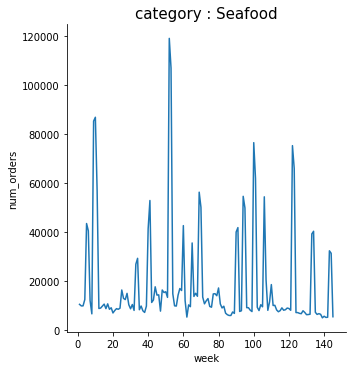

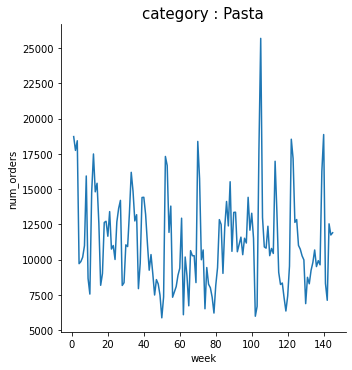

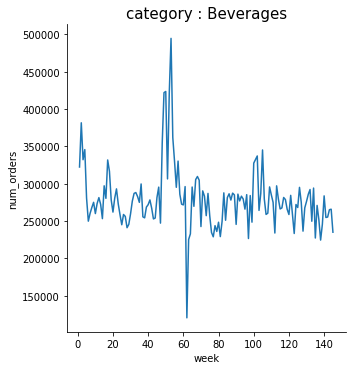

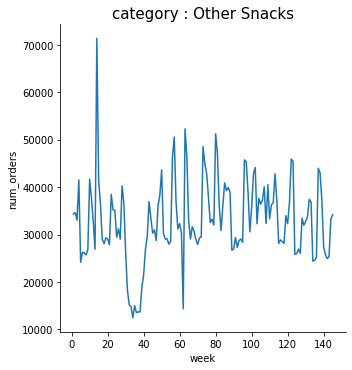

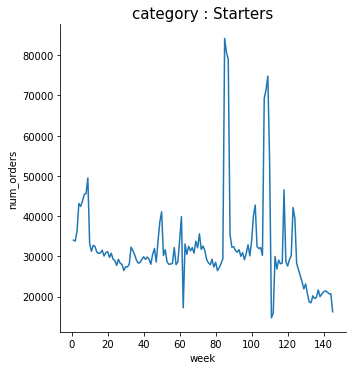

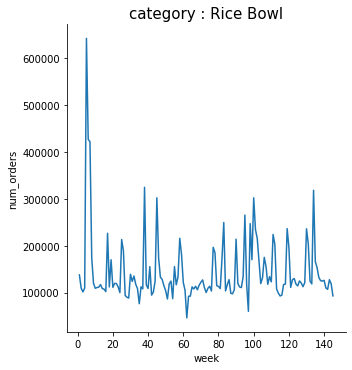

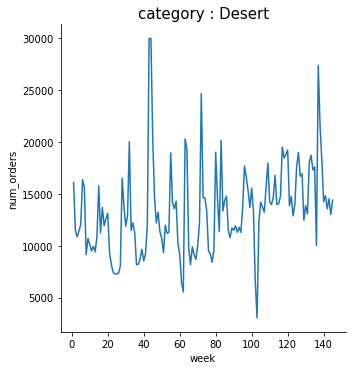

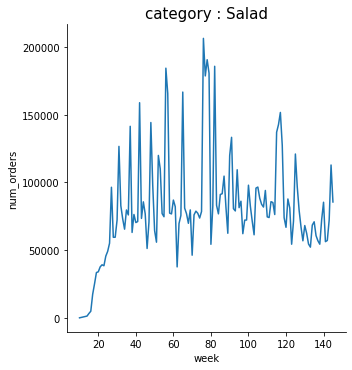

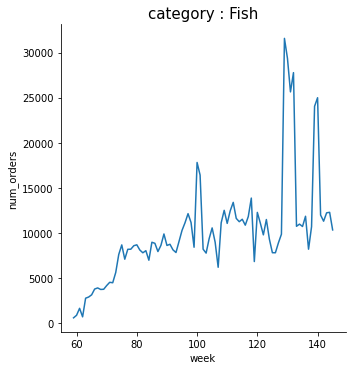

Wall time: 4.4 s


In [318]:
%%time

df_train_byweek = df_train.groupby(['week','category']).sum()
df_train_byweek.reset_index(inplace = True)
cal_id_col = list(df_train_byweek['category'].value_counts().index)

for i in cal_id_col:
    
    df_1 = df_train_byweek[df_train_byweek['category']==i]
    ax = sns.relplot(x='week', y='num_orders', kind='line', data = df_1)
    plt.title('category : {}'.format(i), fontsize=15)
    plt.show()

* category 기준으로 일부 식품카테고리의 경우 상승 및 하락트렌드를 보이나, 나머지 상품들은 주문량을 일정하게 유지하면서, 주문량이 일시적으로 크게 증가하고 다시 감소하는 패턴을 보임
* meal_id 기준의 주문량과 유사하게 일부 상품의 경우 주문량이 크게 증가 할 경우 이후 이전에 평균적으로 유지하던 주문량보다 일시적으로 더 낮아지는 패턴을 보임  